# Demostrating `plot_5prime_end_from_bedgraph.py` by plotting ribonucleotide incorporation data

This is to demonstrate use of `plot_5prime_end_from_bedgraph.py` as a script. We'll use `%run` in a notebook here but it could be called form the command line in similar manner, substituting `python` where `%run` is here. (In fact, for technical reasons there is an example below under the 'Exporting the mined data' section.)

Alternatively, the main function of the script, `plot_5prime_end_from_bedgraph`, could be imported. See [here](https://nbviewer.jupyter.org/github/fomightez/sequencework/blob/master/circos-utilities/demo%20UCSC_chrom_sizes_2_circos_karyotype%20script.ipynb) or [here](https://nbviewer.jupyter.org/github/fomightez/sequencework/blob/master/FindSequence/demo%20find_sequence_element_occurrences_in_sequence%20script.ipynb) or [here](https://nbviewer.jupyter.org/github/fomightez/sequencework/blob/master/alignment-utilities/demo%20roughly_score_relationships_to_subject_seq_pairwise_premsa.ipynb) for this approach used with different scripts.

The data used here comes from [Clausen et al., 2015 (PMID:25622295)](https://www.ncbi.nlm.nih.gov/pubmed/25622295) and was retrieved [here](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE62181).

Because the data are served via FTP and Jupyter sessions served by MyBinder.org cannot access data served from FTP for security purposes, some of the data has been already included in any active Jupyter session launched from the `launch binder` button in [the repository for this demo](https://github.com/fomightez/clausen_ribonucleotides). That route being the one that is strongly encouraged for using this demo notebook so that things will work.

---

**Obtaining the script**:

First we have to obtain the script. It purposefully wasn't already included in the repository because it is still somewhat 'in development'. Running the command in the cell below will use a shell command to copy the script from the Github repository where it is stored into this Jupyter session. 

<div class="alert alert-block alert-warning">
<p>If you haven't used one of these notebooks before, they're basically web pages in which you can write, edit, and run live code. They're meant to encourage experimentation, so don't feel nervous. Just try running a few cells and see what happens!.</p>

<p>
    Some tips:
    <ul>
        <li>Code cells have boxes around them. When you hover over them a <i class="fa-step-forward fa"></i> icon appears.</li>
        <li>To run a code cell either click the <i class="fa-step-forward fa"></i> icon, or click on the cell and then hit <b>Shift+Enter</b>. The <b>Shift+Enter</b> combo will also move you to the next cell, so it's a quick way to work through the notebook.</li>
        <li>While a cell is running a <b>*</b> appears in the square brackets next to the cell. Once the cell has finished running the asterix will be replaced with a number.</li>
        <li>In most cases you'll want to start from the top of notebook and work your way down running each cell in turn. Later cells might depend on the results of earlier ones.</li>
        <li>To edit a code cell, just click on it and type stuff. Remember to run the cell once you've finished editing.</li>
    </ul>
</p>
</div>

In [1]:
!curl -O https://raw.githubusercontent.com/fomightez/sequencework/master/plot_read_data/plot_5prime_end_from_bedgraph.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 31865  100 31865    0     0   114k      0 --:--:-- --:--:-- --:--:--  114k


Note that if you end up using this script for anything productive, it would also be good practice to reference a specific version when you bring it into a Jupyter session to help insure that folks reproducing your analysis will see the same output. (How to get the link for the 'raw' code for a specific version is described [here](https://stackoverflow.com/questions/40054672/how-to-save-code-file-on-github-and-run-on-jupyter-notebook#comment84259526_48587645).) That wasn't done here because I am commonly using this notebook to test the latest version.

**Viewing Usage**:

With the script present in the session now, the 'usage' can be viewed by running the script with the `--help` or `-h` option. You can see the output of that by running the next cell.

In [2]:
%run plot_5prime_end_from_bedgraph.py -h

usage: plot_5prime_end_from_bedgraph.py [-h] [-revo]
                                        [-ctp CUSTOM_TITLE_PREFIX]
                                        [-si SAMPLE_ID] [-svg] [-lim INT]
                                        [-spa] [-npa] [-nda] [-ls] [-exp_d]
                                        start-end FORWARD_DATA REVERSE_DATA

plot_5prime_end_from_bedgraph.py plots data from bedgraph files for a
particular region. **** Script by Wayne Decatur (fomightez @ github) ***

positional arguments:
  start-end             Region to plot indicated by start postion followed by
                        a dash, and then the end position. Example, `200-500`.
                        REQUIRED.
  FORWARD_DATA          Name of file containing the forward data in bedgraph
                        format. REQUIRED.
  REVERSE_DATA          Name of file containing the reverse data in bedgraph
                        format. REQUIRED.

optional arguments:
  -h, --help            show this hel

Because that is a lot to digest. Many of the key options are illustrated or at least mentioned in this notebook.

## Using the script to actual analyze some data

Lets get some data to analyze and do some preparation of the data.

In most contexts the next lines would get the necessary files if uncommented and run.

In [3]:
#!curl -OL https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM1521130&format=file&file=GSM1521130%5FKunkel%5FRibo%2Dseq%5FWT%2E1a%5Fforward%2Ebedgraph%2Egz
#!curl -OL https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM1521130&format=file&file=GSM1521130%5FKunkel%5FRibo%2Dseq%5FWT%2E1a%5Freverse%2Ebedgraph%2Egz 
#!curl -OL https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM1521148&format=file&file=GSM1521148%5FKunkel%5FRibo%2Dseq%5FPol2MLrnh201%2E1a%5Fforward%2Ebedgraph%2Egz
#!curl -OL https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM1521148&format=file&file=GSM1521148%5FKunkel%5FRibo%2Dseq%5FPol2MLrnh201%2E1a%5Freverse%2Ebedgraph%2Egz

Those commands are commented out here though by placing and `#` in front of them because they cannot work on Jupyter sessions served by MyBinder.org because FTP isn't allowed. The `https` connections tried here just seem to orward to using the ftp links. (Oddly, I had to use wget with the https address to see that clearly.)

Therefore, the files with the data archived have been included here already. No need to get them.

We do need to extract the files from the compressed archives. Running the next cell will do that.

In [4]:
!gunzip GSM1521130_Kunkel_Ribo-seq_WT.1a_forward.bedgraph.gz
!gunzip GSM1521130_Kunkel_Ribo-seq_WT.1a_reverse.bedgraph.gz

Let's limit our analysis to the mitochondrial genome for this example. Once we have limited the data we can point the script at it and simply need to designate the region on the mitochondrial chromosome we wish to analyze by supplying the coordinates.

We'll first limit the data by extracting just the mito data using AWK. Run the next cell to do that.

In [5]:
!awk '/^mit_ref_v2/' GSM1521130_Kunkel_Ribo-seq_WT.1a_forward.bedgraph >  GSM1521130_Kunkel_Ribo-seq_WT.1aMITO_forward.bedgraph
!awk '/^mit_ref_v2/' GSM1521130_Kunkel_Ribo-seq_WT.1a_reverse.bedgraph >  GSM1521130_Kunkel_Ribo-seq_WT.1aMITO_reverse.bedgraph

Those detailed file names are great for keep organized but calling them in a script here is going to get laborious. Make copies of the files with concise and clear names. (Because we are documenting things in this notebook, it is still clear what has been done and can be traced back to the real file names.)

In [6]:
!cp GSM1521130_Kunkel_Ribo-seq_WT.1aMITO_forward.bedgraph forward.bedgraph
!cp GSM1521130_Kunkel_Ribo-seq_WT.1aMITO_reverse.bedgraph reverse.bedgraph

In [7]:
%run plot_5prime_end_from_bedgraph.py 28679-29179 forward.bedgraph reverse.bedgraph


Peak number of 5'-ends in forward is 64367, which occurs at position 29041.
Peak number of 5'-ends in reverse is 3060, which occurs at position 28781.
The distance between the most abundant sites of 5'-ends is 261.        

Plot image saved to: 28679-29179_ribonucleotide_plot.png


By default, the produced file is named for the region analyzed. 

You can click it to open in the file browser (accessible by clicking on the 'Jupyter' logo in the upper corner in the classic notebook interface (i.e., not JupyterLab) or using the following code the result can be viewed in the notebook and the image encoded within the notebook when the notebook is saved. This helps to limit files needed to keep track of and when content and stylings are worked out from those smaller file version, the `--large_size` option discussed below can be used to make separate files.

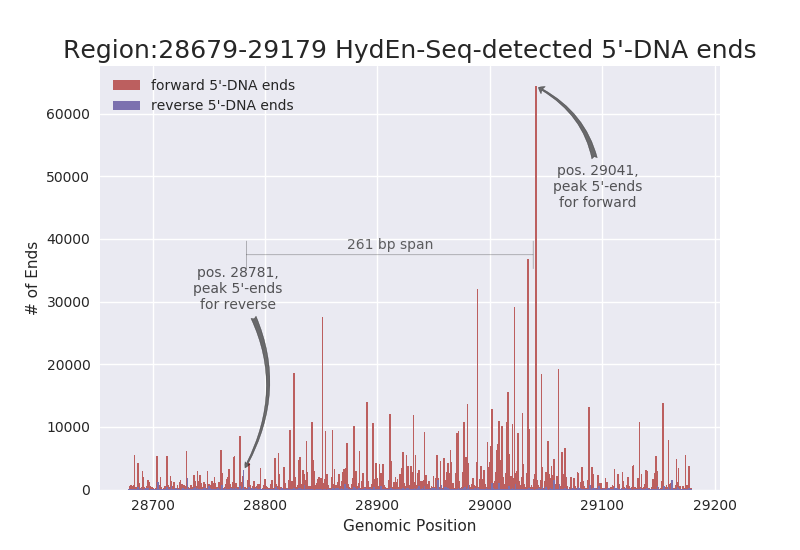

In [8]:
#using code to show overview map b/c encodes as Base64 code and saves with notebook
from IPython.display import Image
Image("28679-29179_ribonucleotide_plot.png")

**Illustrating using flags to adjust the title**

Using the region as a handle in the title of the plot and in the file name is a nice for tracking your files and keeping organized, but what if this region was better known by a name and you preferred using that. In fact, the yeast mitochondrial gene ATP6 is in this region. Let's adjust the text to reflect that using the `--custom_title_prefix` flag. The flag can also be abbrviated `-ctp` as shown in the next cell.

In [9]:
%run plot_5prime_end_from_bedgraph.py 28679-29179 forward.bedgraph reverse.bedgraph -ctp ATP6


Peak number of 5'-ends in forward is 64367, which occurs at position 29041.
Peak number of 5'-ends in reverse is 3060, which occurs at position 28781.
The distance between the most abundant sites of 5'-ends is 261.        

Plot image saved to: ATP6_ribonucleotide_plot.png


Note the name has picked up that tag too.

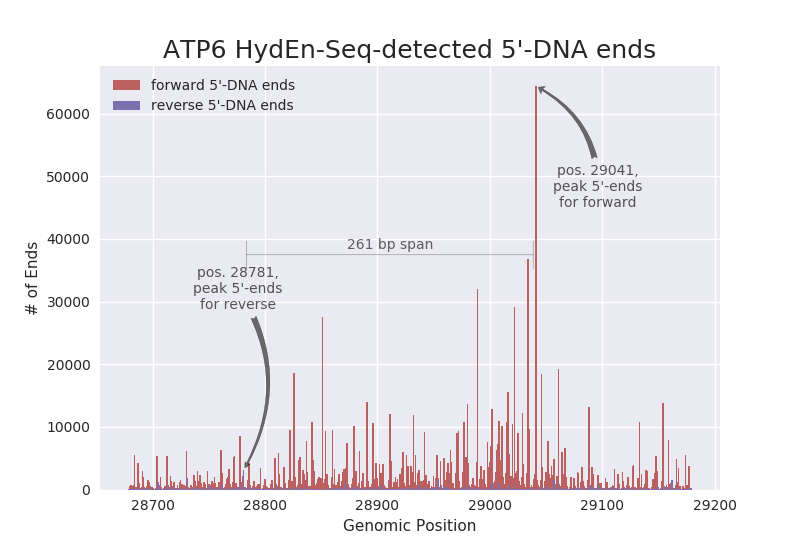

In [10]:
#using code to show overview map b/c encodes as Base64 code and saves with notebook
from IPython.display import Image
Image("ATP6_ribonucleotide_plot.png")

Along those lines, what if you wanted the sample id to appear in the title, too.  
To do that you can use the `--sample_id` flag. It can be abbreviated `-si`.

In [11]:
%run plot_5prime_end_from_bedgraph.py 28679-29179 forward.bedgraph reverse.bedgraph -ctp ATP6 --sample_id WT1a


Peak number of 5'-ends in forward is 64367, which occurs at position 29041.
Peak number of 5'-ends in reverse is 3060, which occurs at position 28781.
The distance between the most abundant sites of 5'-ends is 261.        

Plot image saved to: ATP6_WT1a_ribonucleotide_plot.png


As with the custom prefix, the file name gets tagged with this information too.

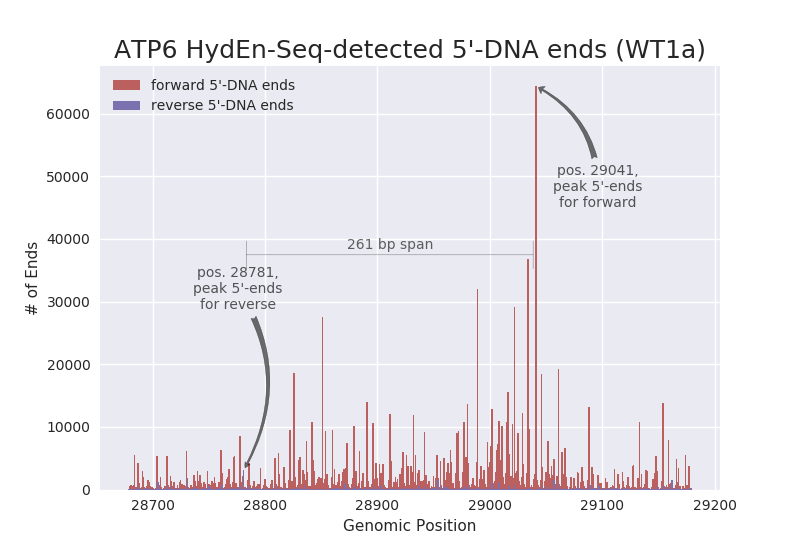

In [12]:
#using code to show overview map b/c encodes as Base64 code and saves with notebook
from IPython.display import Image
Image("ATP6_WT1a_ribonucleotide_plot.png")

**Illustrating some other options**

What if you had wanted the data from the other direction. For example, maybe the gene in the region is on the reverse strand, and so you are used to thinking of the direction of the involved gene as the direction 'forward' and note the 'forward' strand of the chromosome.

In order to do that, you still provide the start and end coordinates as low and high in that order, but you add the `--reverse_orientation` flag in the command. That is illustrated by the next command.

In [13]:
%run plot_5prime_end_from_bedgraph.py 28679-29150 forward.bedgraph reverse.bedgraph --reverse_orientation


Peak number of 5'-ends in forward is 64367, which occurs at position 29041.
Peak number of 5'-ends in reverse is 3060, which occurs at position 28781.
The distance between the most abundant sites of 5'-ends is 261.        

Plot image saved to: 28679-29150_ribonucleotide_plot.png


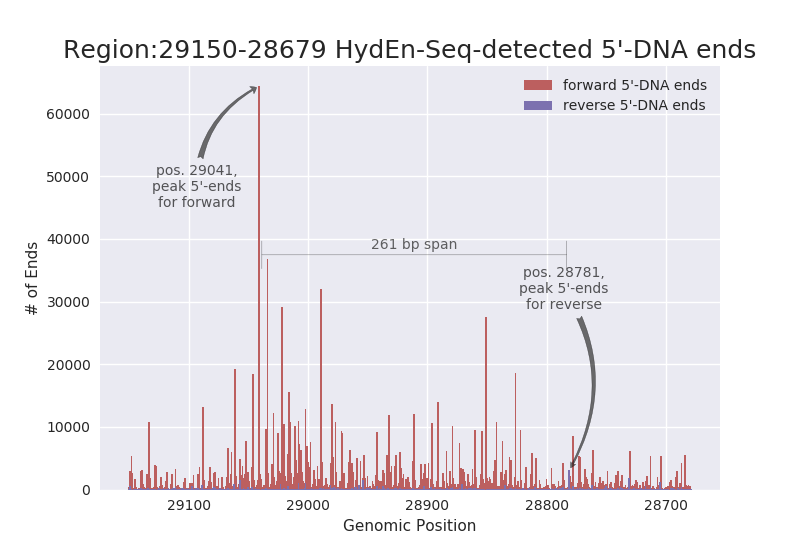

In [14]:
#using code to show overview map b/c encodes as Base64 code and saves with notebook
from IPython.display import Image
Image("28679-29150_ribonucleotide_plot.png")

Note that the genomic coordinates in the image above increase right-to-left to reflect 5'-to-3' of the reverse strand being the focus.



The yeast mitochondrial chromosome is very asymmetric with very few genes on the other strand and actually there isn't any gene there on the reverse strand. Somewhere where there is a gene on the reverse strand is shown next to illustrate the possibility to turn off the annotations.

In [15]:
%run plot_5prime_end_from_bedgraph.py 78000-78298 forward.bedgraph reverse.bedgraph --reverse_orientation


Peak number of 5'-ends in forward is 576, which occurs at position 78101.
Peak number of 5'-ends in reverse is 286, which occurs at position 78152.
The distance between the most abundant sites of 5'-ends is 52.        

Plot image saved to: 78000-78298_ribonucleotide_plot.png


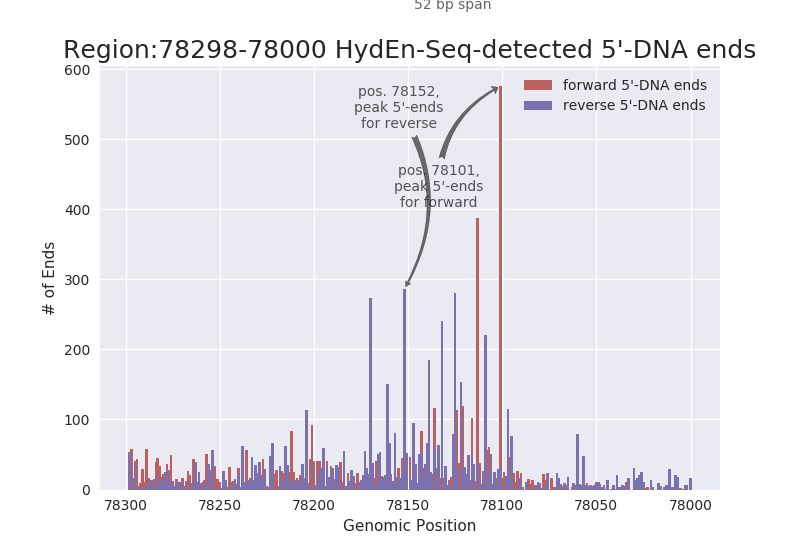

In [16]:
#using code to show overview map b/c encodes as Base64 code and saves with notebook
from IPython.display import Image
Image("78000-78298_ribonucleotide_plot.png")

However, the automatic annotations are messy here. What if you just instead choose to limit the annotation to the maximum peak. To do that you can use the `--single_peak_annotation` flag, abbreviated `-spa` to do that.

Plus, we'll turn off the span distance as it is not getting placed well. (Note the `52 bp` floating above the plot title.) To do that we'll add the `--no_dist_annotation` flag, abbreviated `-nda`, as well.

(Note first we move the previous file to a new name so that it is possible to compare the old and new output if desired.)

In [17]:
!mv 78000-78298_ribonucleotide_plot.png MESSY78000-78298_ribonucleotide_plot.png
%run plot_5prime_end_from_bedgraph.py 78000-78298 forward.bedgraph reverse.bedgraph -spa -nda --reverse_orientation


Peak number of 5'-ends in forward is 576, which occurs at position 78101.
Peak number of 5'-ends in reverse is 286, which occurs at position 78152.
The distance between the most abundant sites of 5'-ends is 52.        

Plot image saved to: 78000-78298_ribonucleotide_plot.png


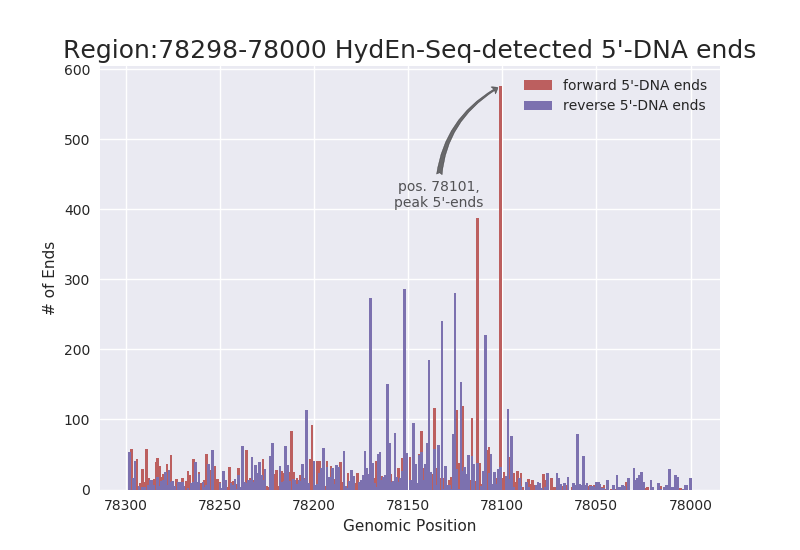

In [18]:
#using code to show overview map b/c encodes as Base64 code and saves with notebook
from IPython.display import Image
Image("78000-78298_ribonucleotide_plot.png")

Another option would be to turn both peak annotations off. Perhaps to point out or highlight the approriate data in post-processing of the image instead.

(Again, the previous image is first renamed so that it isn't clobbered.)

In [19]:
!mv 78000-78298_ribonucleotide_plot.png SPA78000-78298_ribonucleotide_plot.png
%run plot_5prime_end_from_bedgraph.py 78000-78298 forward.bedgraph reverse.bedgraph -npa -nda --reverse_orientation


Peak number of 5'-ends in forward is 576, which occurs at position 78101.
Peak number of 5'-ends in reverse is 286, which occurs at position 78152.
The distance between the most abundant sites of 5'-ends is 52.        

Plot image saved to: 78000-78298_ribonucleotide_plot.png


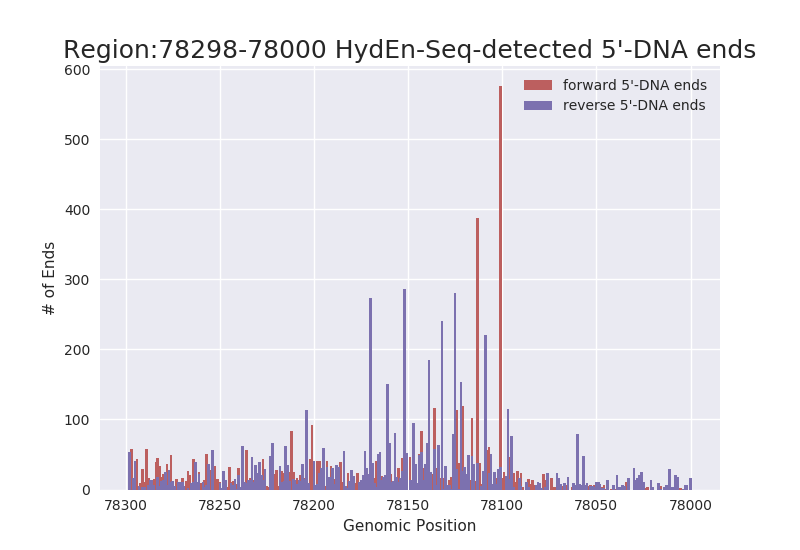

In [20]:
#using code to show overview map b/c encodes as Base64 code and saves with notebook
from IPython.display import Image
Image("78000-78298_ribonucleotide_plot.png")

No peak and distance annotations as specified by the flags when the script was called.

## Analyzing another sample

The Clausen et al. 2015 data available [here](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE62181) includes data for twenty-eight other samples besides WT1a. Let's use another set to show how quickly different, but related data can be analyzed with this script and worked out commands. (For reasons already discussed, the zipped data for this other set was already included in the repository and available in the session if launched properly.)

In [21]:
!gunzip GSM1521148_Kunkel_Ribo-seq_Pol2MLrnh201.1a_forward.bedgraph.gz
!gunzip GSM1521148_Kunkel_Ribo-seq_Pol2MLrnh201.1a_reverse.bedgraph.gz
!awk '/^mit_ref_v2/' GSM1521148_Kunkel_Ribo-seq_Pol2MLrnh201.1a_forward.bedgraph >  GSM1521148_Kunkel_Ribo-seq_Pol2MLrnh201.1aMITO_forward.bedgraph
!awk '/^mit_ref_v2/' GSM1521148_Kunkel_Ribo-seq_Pol2MLrnh201.1a_reverse.bedgraph >  GSM1521148_Kunkel_Ribo-seq_Pol2MLrnh201.1aMITO_reverse.bedgraph
!cp GSM1521148_Kunkel_Ribo-seq_Pol2MLrnh201.1aMITO_forward.bedgraph forwardml.bedgraph
!cp GSM1521148_Kunkel_Ribo-seq_Pol2MLrnh201.1aMITO_reverse.bedgraph reverseml.bedgraph
%run plot_5prime_end_from_bedgraph.py 28679-29179 forwardml.bedgraph reverseml.bedgraph -ctp ATP6 --sample_id pol2MLrnh201Δ1a


Peak number of 5'-ends in forward is 7684, which occurs at position 29041.
Peak number of 5'-ends in reverse is 184, which occurs at position 29162.
The distance between the most abundant sites of 5'-ends is 122.        

Plot image saved to: ATP6_pol2MLrnh201Δ1a_ribonucleotide_plot.png


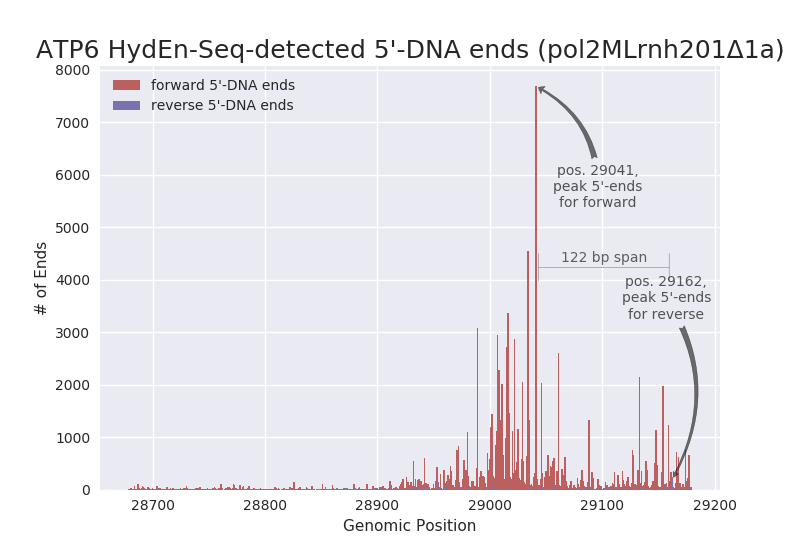

In [22]:
#using code to show overview map b/c encodes as Base64 code and saves with notebook
from IPython.display import Image
Image("ATP6_pol2MLrnh201Δ1a_ribonucleotide_plot.png")

There is still a lot of data here, but I note that the scale is much different for this sample than the one above. The image below shows that the overall number of reads is actually similar for the samples.

![similar amounts of data collected for both samples](https://raw.githubusercontent.com/fomightez/clausen_ribonucleotides/master/composited_clausen_read_number_info.png)

That information comes from [here](https://www.ncbi.nlm.nih.gov/sra?term=SRX729832) and [here](https://www.ncbi.nlm.nih.gov/sra?term=SRX729850).

Since the samples actually had about as many reads, I wonder if this reflects the variability in the mitochondrial content of the strains, the degree in handling variations in sample processing that can arise with the HydEn-Seq method, or both?  
Importantly, the pattern for the forward reads is the same overall.




## Publication quality images or vector graphics versions

The default settings generate images large enough to examine, yet small enough to keep files menageable. However, for publication you may want an image with many pixels so that you can adjust to a size and resolution necessary. For that there is the `--large_size` flag, abbreviated `-ls`. It will produce an image of 1600 dpi. 

Additionally, it is possible to make vector graphics versions of the image that are infinitely scaelable using graphics software that handles vector graphics, such as Inkscape or Adobe Illlustrator. For that, use the `--svg` flag. Simply, `-svg` as a flag does the same thing.

## Exporting the mined data

In the course of preparing the data for the plot the script `plot_5prime_end_from_bedgraph.py` extracts the scrore data for the forward and reverse strands in the region specified. This can be exported as tabular data in comma-separated format using the `--export_data` flag to call the script. **Note though that run with this flag, no plot will be made by the script despite the scripts name.** It is meant as a utility feature to save reprocessing the same data that could be used by other scripts and computational tools. Or opened in spreadsheet software for further editing or analysis.

(Note to redirect the stdout to a file, I am running this on the command line using `!` to send it to an external temporary shell.)

In [23]:
!python plot_5prime_end_from_bedgraph.py 28487-28679 forward.bedgraph reverse.bedgraph --export_data > export_demo.csv 


Peak number of 5'-ends in forward is 5825, which occurs at position 28629.
Peak number of 5'-ends in reverse is 1655, which occurs at position 28654.
The distance between the most abundant sites of 5'-ends is 26.        
The data that would have been used to make the plot follows (unless ` > [FILE_NAME]` was
used to redirect the data to a file; in that case, examine the contents of that file):


Looking at the top of the file generated shows it worked.

In [24]:
!head export_demo.csv

position,starts_per_position_forward,starts_per_position_reverse
28487,230,29
28488,43,29
28489,2,17
28490,40,26
28491,397,0
28492,183,0
28493,37,29
28494,52,81
28495,69,0


## Plotting other data

The impetus for writing `plot_5prime_end_from_bedgraph.py` was to plot ribonucleotide incorporation data from [Clausen et al., 2015 (PMID:25622295)](https://www.ncbi.nlm.nih.gov/pubmed/25622295); however, it is more general than that as it can plot any 5'-end data in bedgraph files. As of the time of writing this though part of the title text and other things reflecting that intention is hard coded inside the script, and so you should look at some of the variables under 'USER ADJUSTABLE VALUES ' and edit the text to reflect your data if you use it for something else.


# Conclusion

That should provide you with a good basis for getting started using this script. Refer to USAGE for anything not covered here. And remember, if you need a place to use this script with your own data, you can always upload it to a running session and analyze it there with everything all set except your data. (Assuming your data doesn't contain overly sensitive information and it doesn't violate any privacy rules for using your data. See more about preivacy and security [here](https://mybinder.readthedocs.io/en/latest/faq.html#how-does-mybinder-org-ensure-user-privacy) and [here](https://mybinder.readthedocs.io/en/latest/faq.html#how-secure-is-mybinder-org), respetively.)